# Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/DATA/Data DC 5 Kelas.xlsx'
data = pd.read_excel(file_path)

data.head()

,Country,Sovereign,Kategori,GDP (USDbn),Real GDP Growth (%),GDP Volatility (10 yr roll (%)),Consumer prices (annual avg. % growth),GG balance (% GDP),GG debt (% GDP),Comm. Dep (%CXR),GG int. exp. (% revenue),GG dom. debt (% GDP),GXD (% GDP),GDP per. cap. (USD),CAB (% GDP)
0,Switzerland,AAA,0,925,1.3,2.0,1.1,0.5,25.0,16.5,0.7,21.9,258.6,102746,5.8
1,Germany,AAA,0,4658,-0.2,2.1,2.5,-2.6,63.6,9.3,2.0,36.7,178.1,54932,5.9
2,Denmark,AAA,0,426,2.3,2.2,1.4,2.3,31.3,15.2,1.3,25.5,161.5,71269,10.5
3,Luxembourg,AAA,0,93,1.0,2.6,2.3,-0.4,23.9,1.0,1.0,6.1,4502.2,137209,13.8
4,Netherlands,AAA,0,1225,0.9,2.7,3.2,-1.6,44.1,19.0,1.6,28.1,350.9,68295,9.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 122 non-null    object 
 1   Sovereign                               122 non-null    object 
 2   Kategori                                122 non-null    int64  
 3   GDP (USDbn)                             122 non-null    int64  
 4   Real GDP Growth (%)                     122 non-null    float64
 5   GDP Volatility (10 yr roll (%))         122 non-null    float64
 6   Consumer prices (annual avg. % growth)  122 non-null    float64
 7   GG balance (% GDP)                      122 non-null    float64
 8   GG debt (% GDP)                         122 non-null    float64
 9   Comm. Dep (%CXR)                        122 non-null    float64
 10  GG int. exp. (% revenue)                122 non-null    float6

In [ ]:
data.isnull().sum()

,0
Country,0
Sovereign,0
Kategori,0
GDP (USDbn),0
Real GDP Growth (%),0
GDP Volatility (10 yr roll (%)),0
Consumer prices (annual avg. % growth),0
GG balance (% GDP),0
GG debt (% GDP),0
Comm. Dep (%CXR),0


In [ ]:
data.describe()

,Kategori,GDP (USDbn),Real GDP Growth (%),GDP Volatility (10 yr roll (%)),Consumer prices (annual avg. % growth),GG balance (% GDP),GG debt (% GDP),Comm. Dep (%CXR),GG int. exp. (% revenue),GG dom. debt (% GDP),GXD (% GDP),GDP per. cap. (USD),CAB (% GDP)
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.319672,874.598361,2.893443,3.946721,6.784426,-2.604918,59.633607,31.277049,10.117213,33.886066,147.757377,25826.377049,0.898443
std,1.356139,3187.335146,2.335983,3.509943,22.403099,3.969884,32.130276,25.339835,10.705754,26.211493,418.085772,27768.441869,7.735103
min,0.000000,2.000000,-2.800000,1.000000,-0.400000,-18.500000,0.000000,0.600000,0.000000,0.000000,3.400000,631.000000,-20.300000
25%,1.000000,43.000000,1.225000,2.300000,1.700000,-4.600000,38.675000,11.650000,3.500000,15.150000,44.400000,4952.500000,-2.675000
50%,2.000000,123.000000,2.800000,3.300000,2.950000,-2.900000,54.650000,18.950000,6.400000,29.150000,70.450000,14263.000000,0.150000
75%,4.000000,488.000000,4.300000,4.400000,4.500000,-0.850000,75.600000,52.600000,13.800000,48.725000,124.250000,37496.250000,4.675000
max,4.000000,29184.000000,9.400000,33.600000,236.800000,11.700000,218.200000,88.300000,65.800000,190.700000,4502.200000,137209.000000,33.800000


In [ ]:
data.dtypes

,0
Country,object
Sovereign,object
Kategori,int64
GDP (USDbn),int64
Real GDP Growth (%),float64
GDP Volatility (10 yr roll (%)),float64
Consumer prices (annual avg. % growth),float64
GG balance (% GDP),float64
GG debt (% GDP),float64
Comm. Dep (%CXR),float64


# Eksplorasi Data

## Cek Korelasi antar Peubah Independen

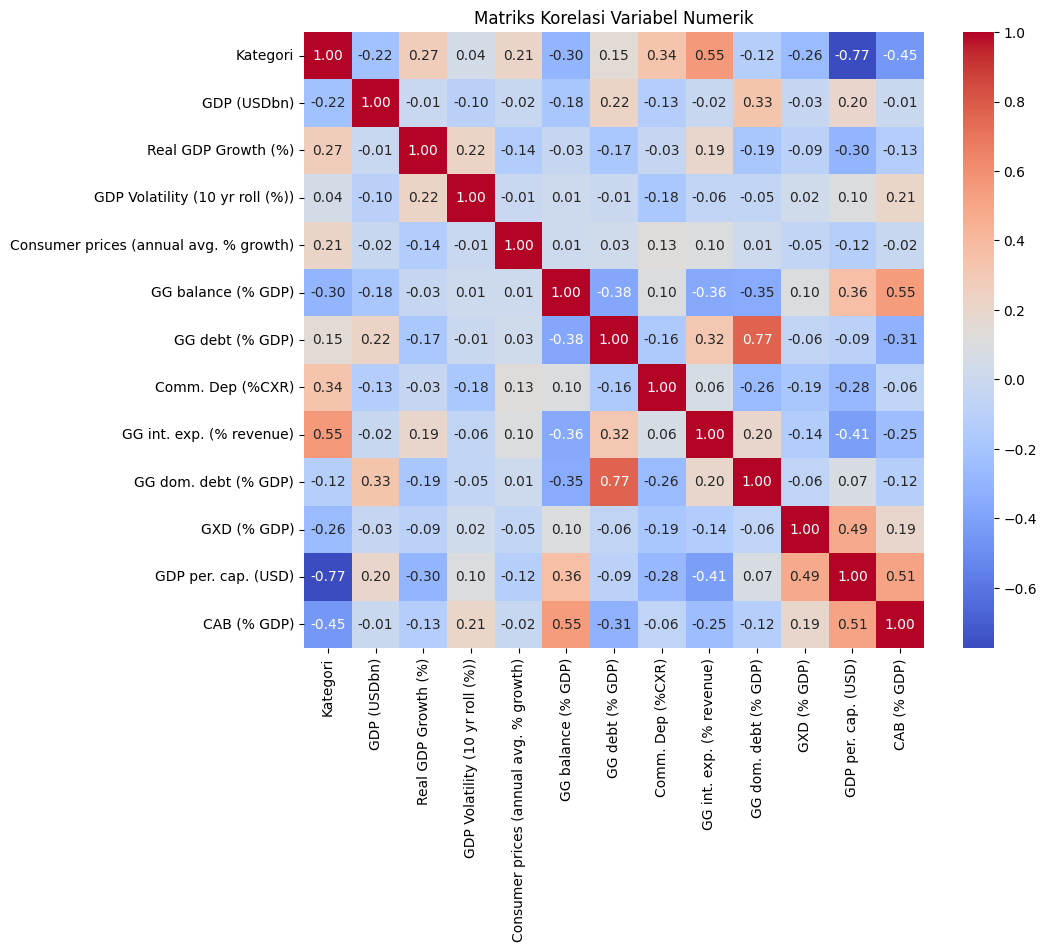

In [ ]:
data.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()


## Eksplorasi Peubah Numerik

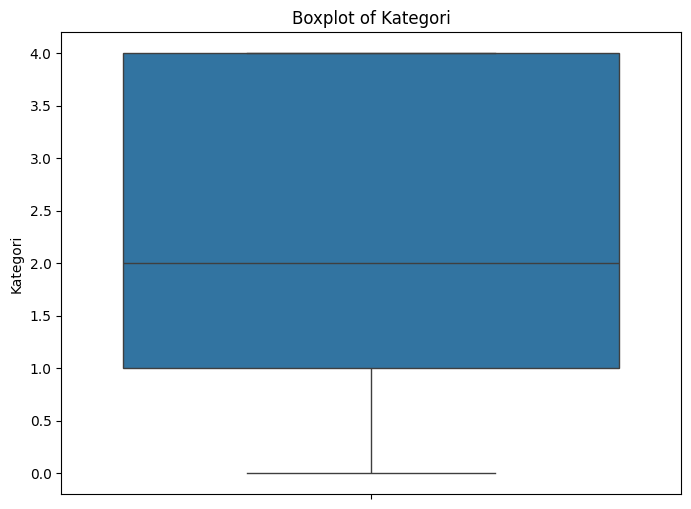

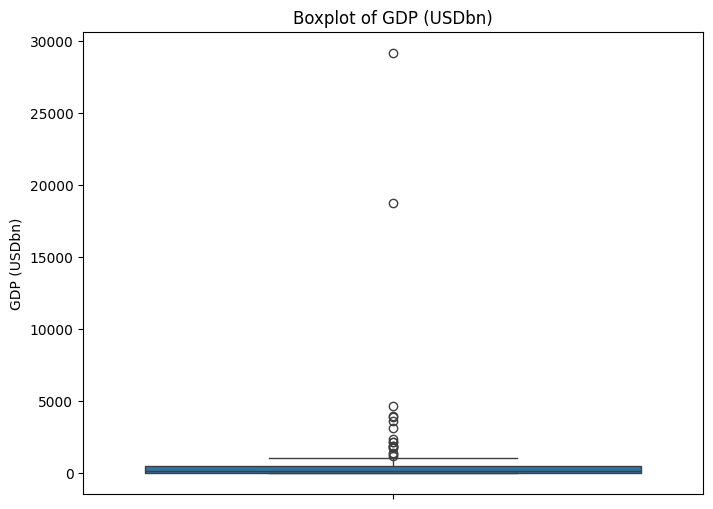

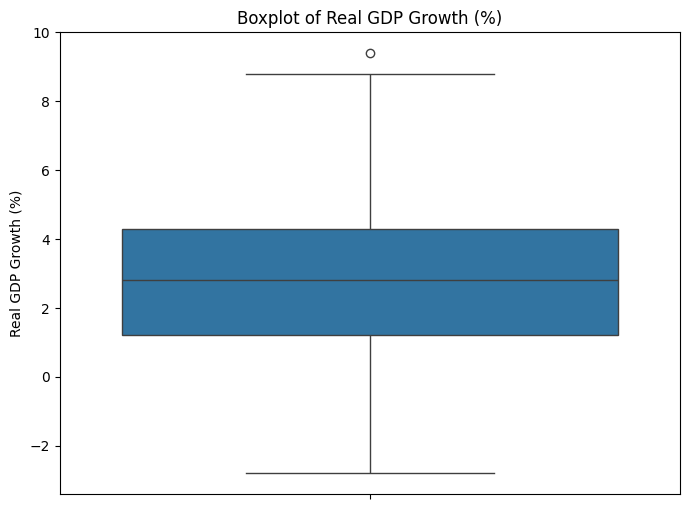

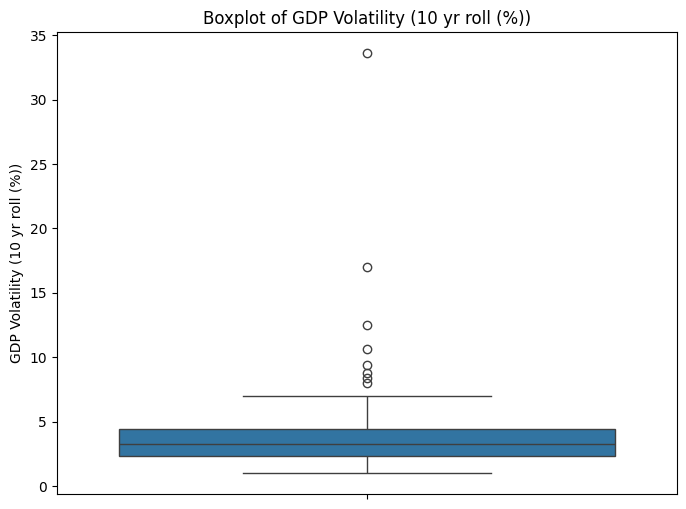

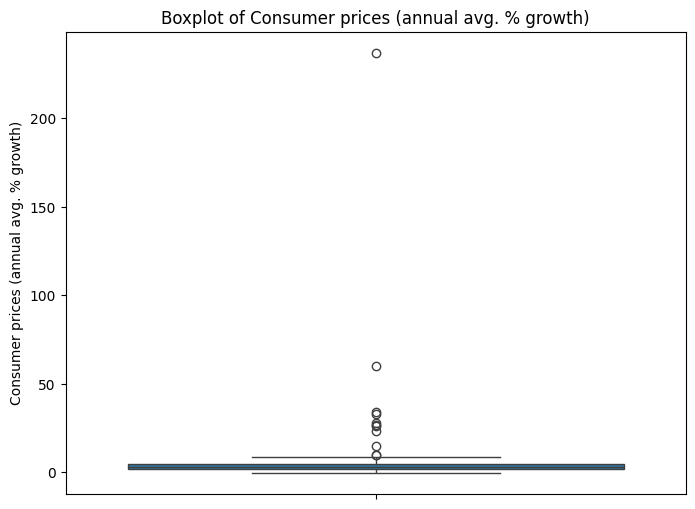

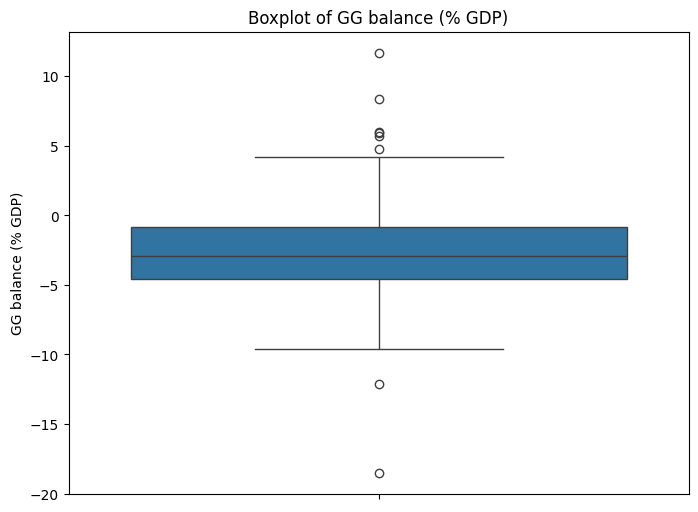

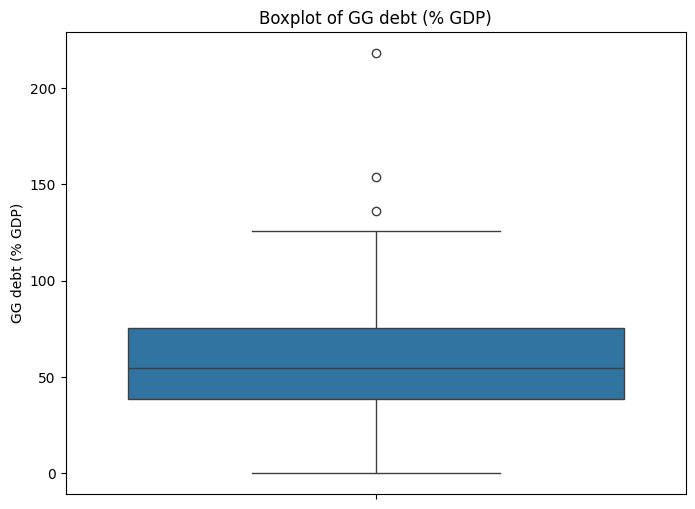

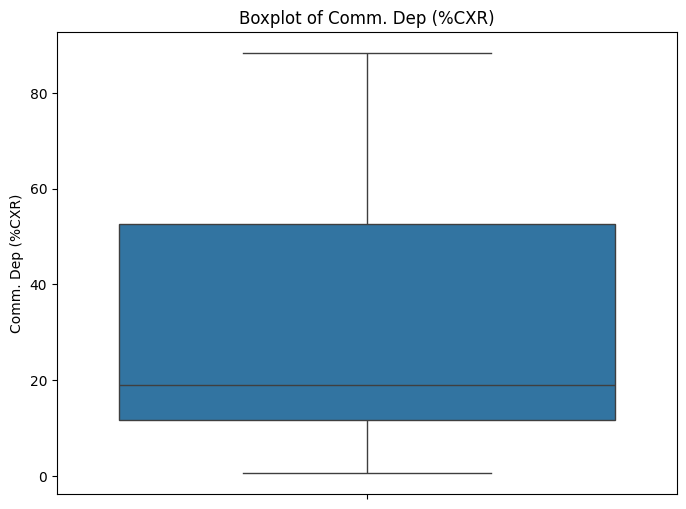

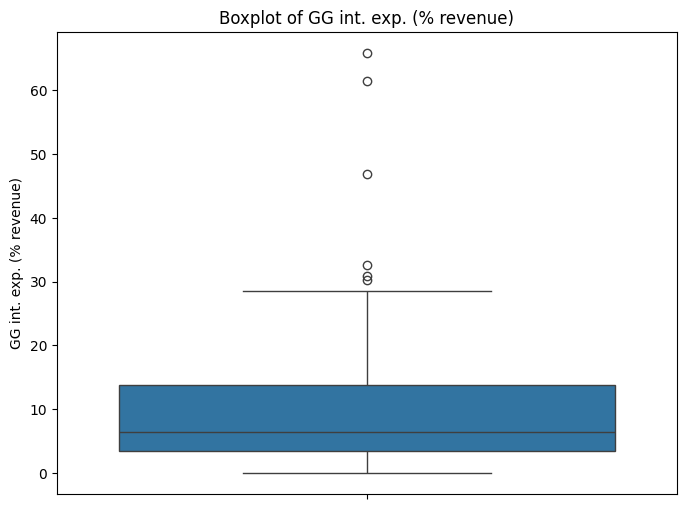

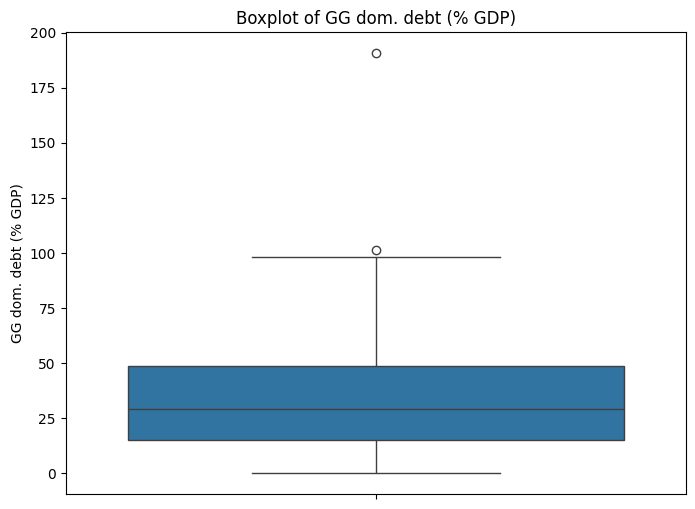

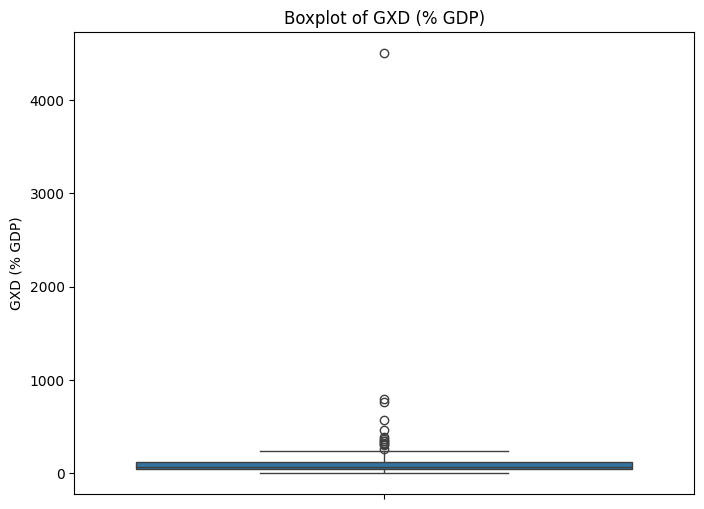

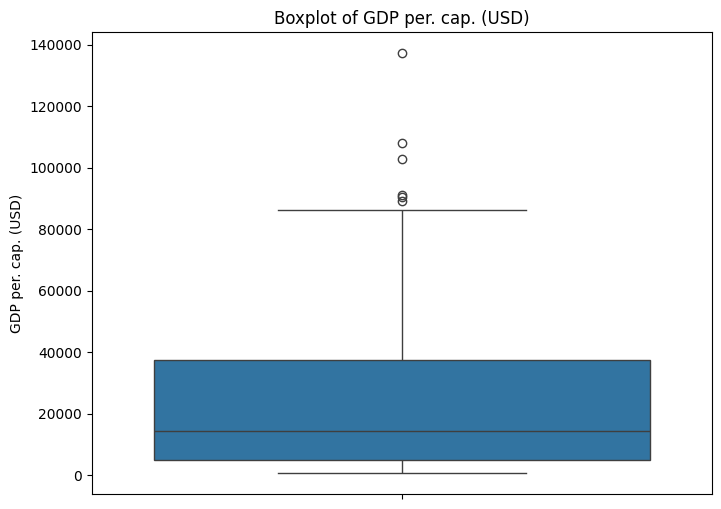

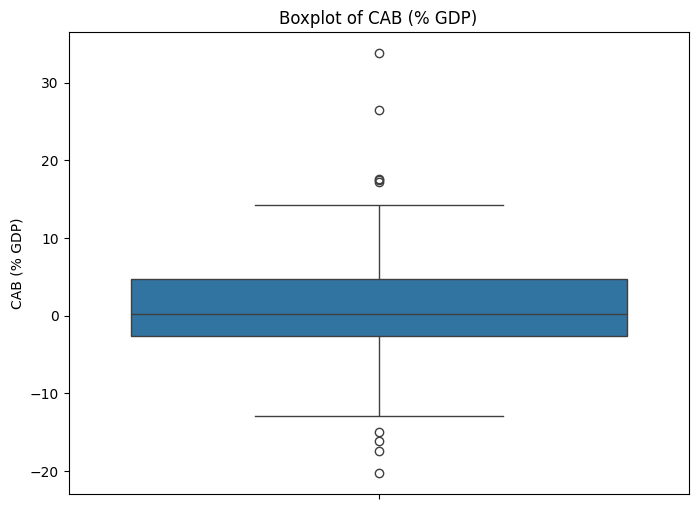

In [ ]:
# prompt: buatkan syntax untuk membuat boxplot dari peubah numerik df, buatkan tampilan boxplotnya vertikal

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame and contains numerical columns you want to plot.
# Replace 'numerical_column' with the actual name of the numerical column you want to visualize.

numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=data[column], orient='v') # vertical boxplot
  plt.title(f'Boxplot of {column}')
  plt.ylabel(column)
  plt.show()


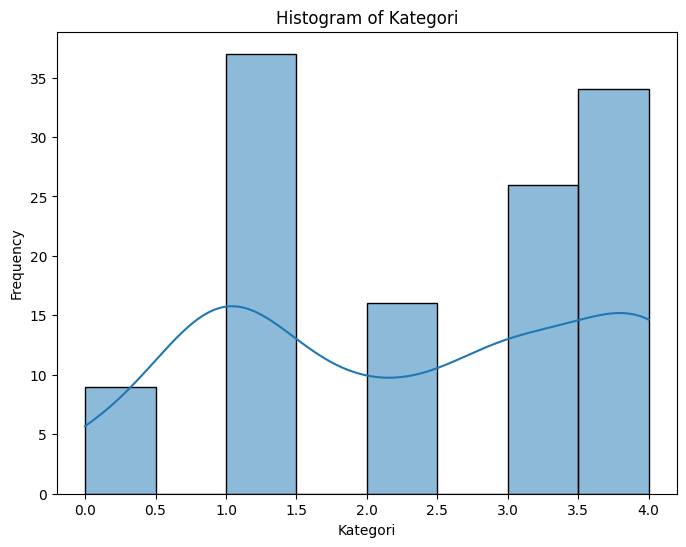

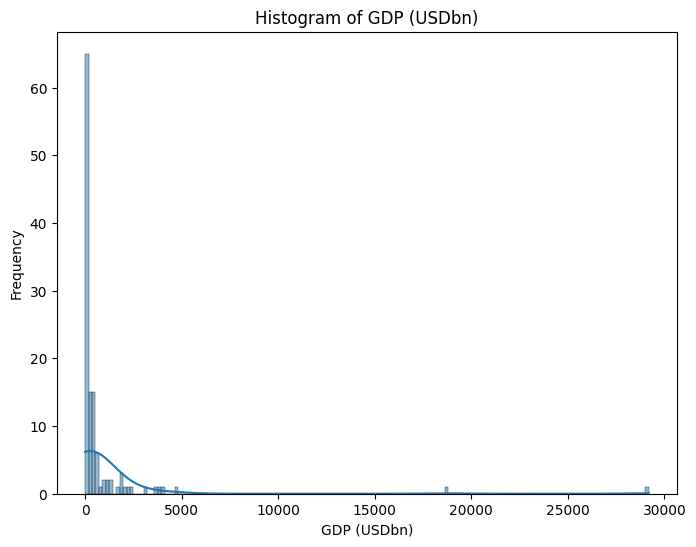

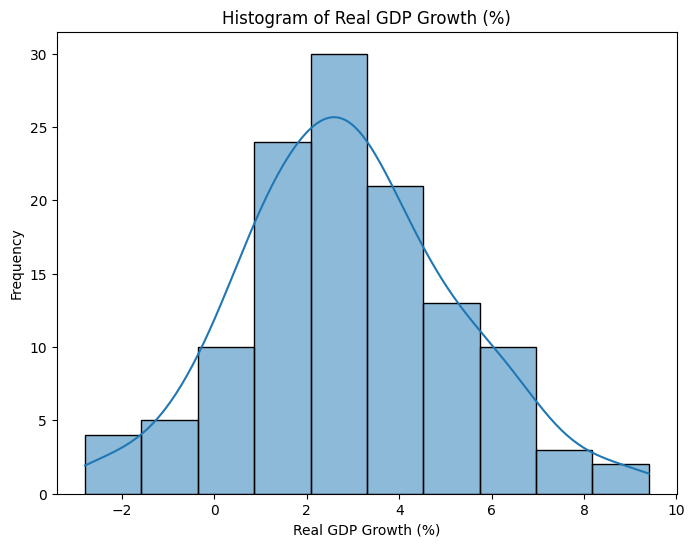

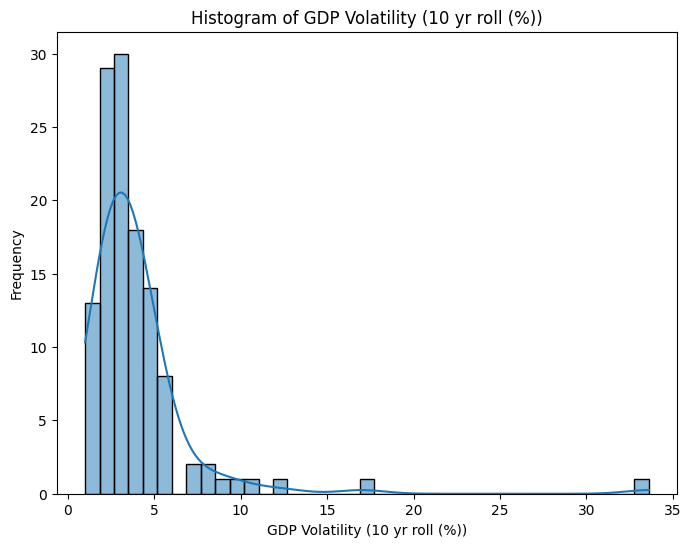

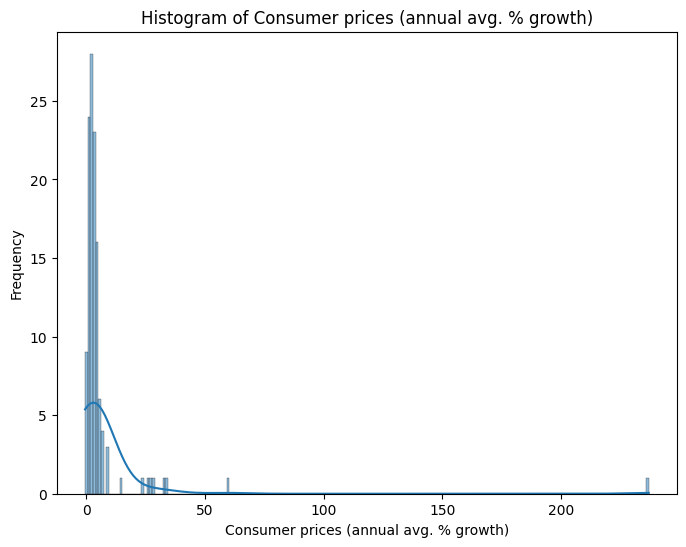

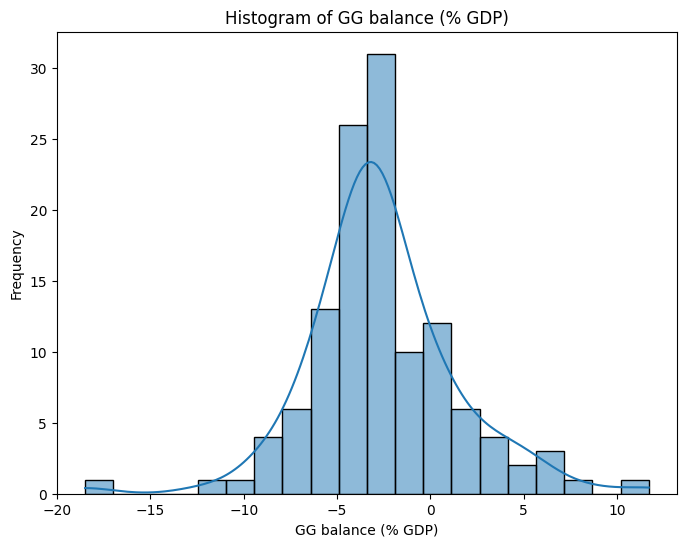

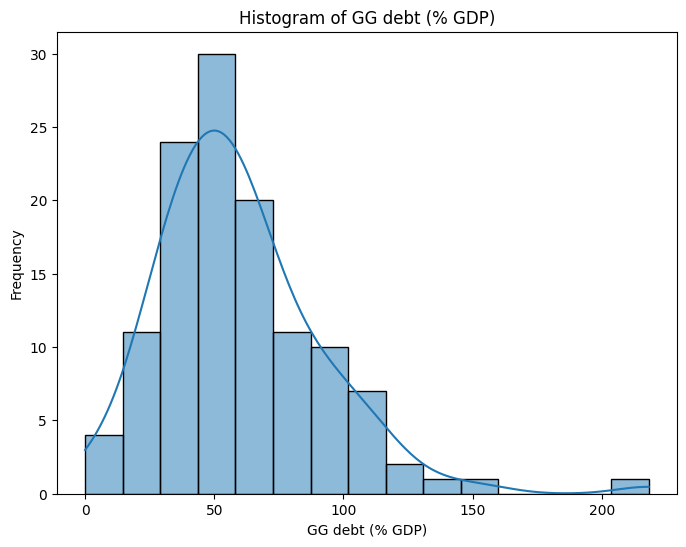

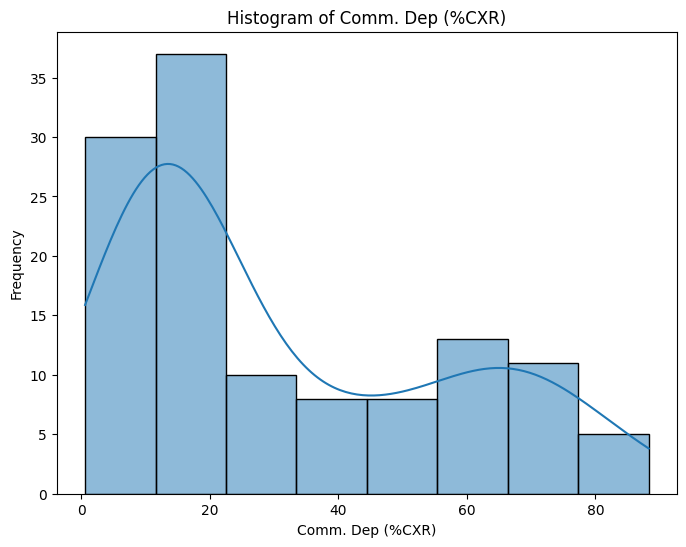

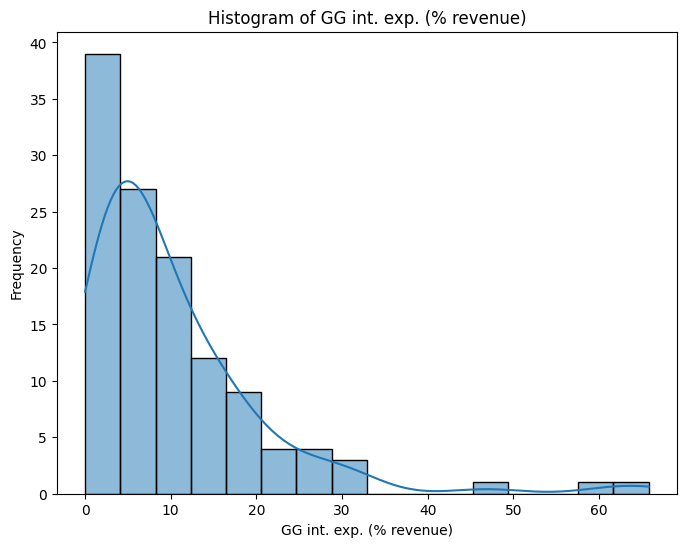

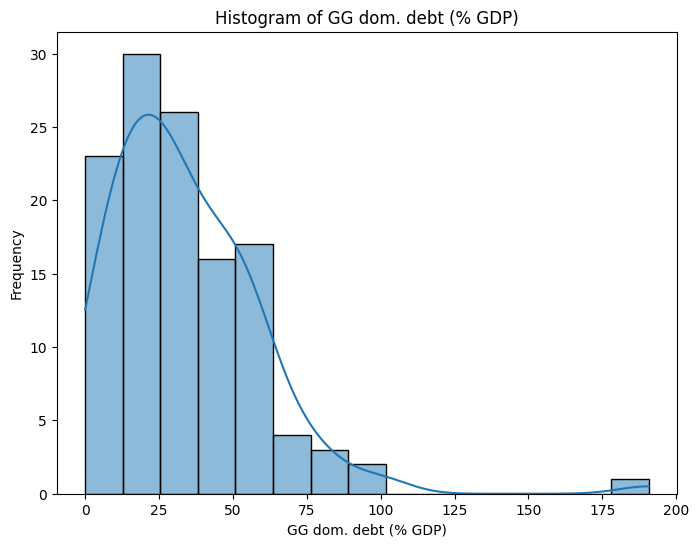

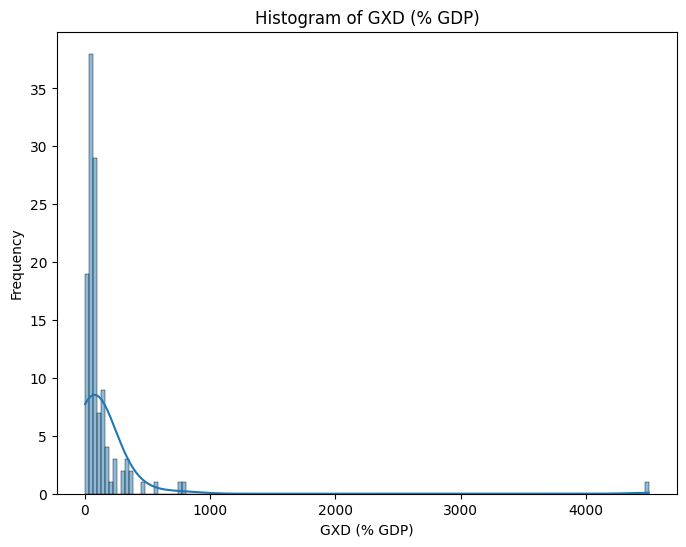

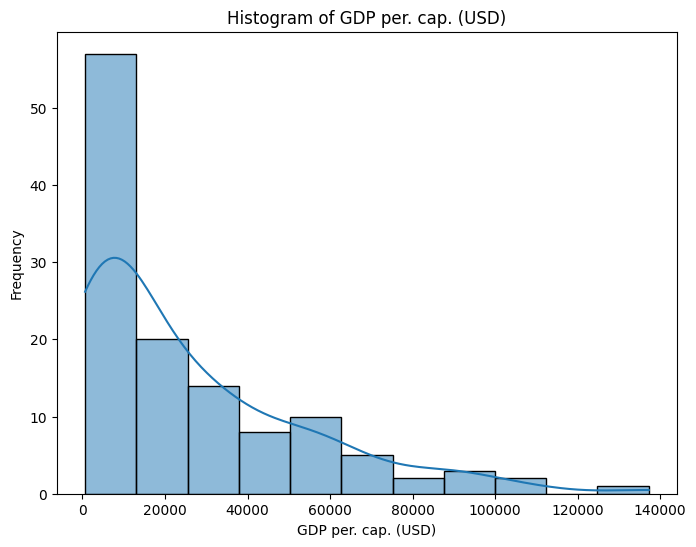

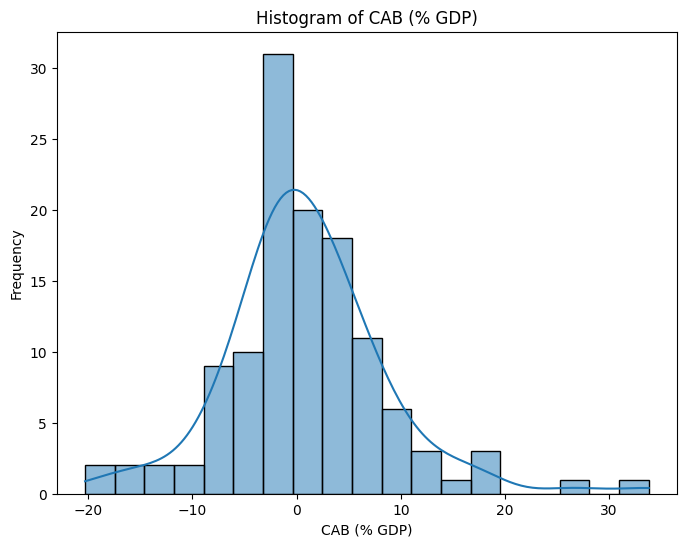

In [ ]:
# prompt: buatkan eksplorasi histogram semua variabel numerik dari df

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains numerical columns you want to plot.
# Replace 'numerical_column' with the actual name of the numerical column you want to visualize.

numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[column], kde=True)  # Histogram with KDE
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


## Eksplorasi Sebaran Peubah Kategorik

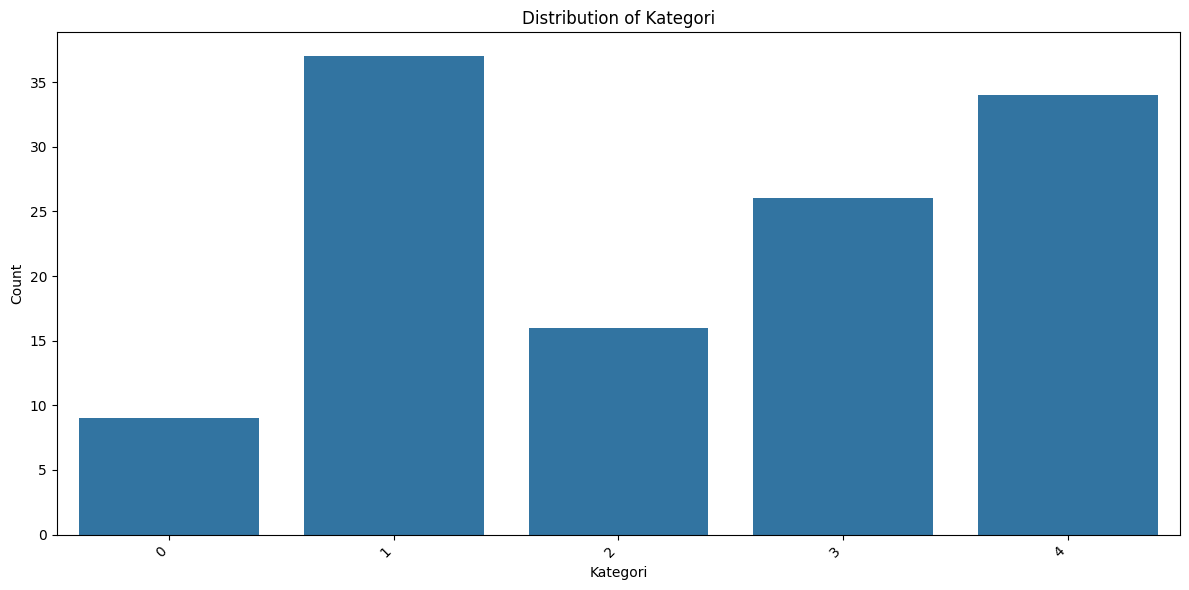

In [ ]:
# prompt: buatkan barchart untuk variabel kategori di df dan ganti nama elemennya dimana angka 1 = Sovereign Elite, 2 =Strong Investment Grade, 3 = Lower Investment Grade, 4 =Non-Investment Grade (Upper Tier), 5  =Distressed and Defaulted

# Assuming 'df' is your DataFrame and contains a categorical column named 'kategori'.
# Replace 'kategori' with the actual name of your categorical column.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Kategori', data=data)
plt.title('Distribution of Kategori')
plt.xlabel('Kategori')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Splitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# prompt: buatkan variabel X dimana isinya selain peubah Country, Sovereign, Kategori

X = data.drop(columns=['Country', 'Sovereign', 'Kategori'])
Y = data['Kategori']

In [ ]:
# prompt: buatkan syntax pembagian data train dan testing dari X dan Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(97, 12)
(25, 12)
(97,)
(25,)


# SMOTE

In [ ]:
# prompt: lakukan balancing data dengan smote

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("Shape after SMOTE:")
print(X_train_resampled.shape)
print(Y_train_resampled.shape)

print("\nDistribution of Kategori after SMOTE:")
print(Y_train_resampled.value_counts())

Shape after SMOTE:
(145, 12)
(145,)

Distribution of Kategori after SMOTE:
Kategori
4    29
1    29
3    29
2    29
0    29
Name: count, dtype: int64


In [ ]:
# prompt: lakukan normalisasi dengan minmaxscaler ini data hasil smote ga si

# Lakukan normalisasi dengan MinMaxScaler pada data hasil SMOTE

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Jika Anda ingin mengembalikan data yang diskalakan ke dalam DataFrame, Anda bisa melakukannya seperti ini:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nData X_train setelah normalisasi (sebagian):")
print(X_train_scaled_df.head())

print("\nData X_test setelah normalisasi (sebagian):")
print(X_test_scaled_df.head())



Data X_train setelah normalisasi (sebagian):
   GDP (USDbn)  Real GDP Growth (%)  GDP Volatility (10 yr roll (%))  \
0     0.000747             0.225000                         0.153374   
1     1.000000             0.633333                         0.027607   
2     0.001067             0.491667                         0.024540   
3     0.000800             0.450000                         0.049080   
4     0.013552             0.175000                         0.033742   

   Consumer prices (annual avg. % growth)  GG balance (% GDP)  \
0                                0.019019            0.483444   
1                                0.000000            0.397351   
2                                0.008453            0.605960   
3                                0.016906            0.460265   
4                                0.011412            0.506623   

   GG debt (% GDP)  Comm. Dep (%CXR)  GG int. exp. (% revenue)  \
0         0.176444          0.233751                  0.066667  

# Pemodelan XGBoost Penanganan SMOTE


## Tuning Hyperparameter 1

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
}

## Hyperparameter Tuning 1 dan Grid Search

In [ ]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)
# Lakukan grid search pada data training
grid_search.fit(X_train_scaled_df, Y_train_resampled)
# Cetak hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Best score: 0.7862068965517242


## Evaluasi Model Terbaik 1

In [ ]:
# prompt: evaluasi model terbaik 1, tampilkan prediksi data latih, evaluasi model pada data latih, prediksi pada data uji, evaluasi model pada data uji, akurasi data latih dan data uji

# Dapatkan model terbaik dari grid search
best_model = grid_search.best_estimator_

# Prediksi data latih
y_train_pred = best_model.predict(X_train_scaled_df)

# Evaluasi model pada data latih
print("\nEvaluasi Model Terbaik 1 pada Data Latih:")
print("Accuracy:", accuracy_score(Y_train_resampled, y_train_pred))
print("Precision:", precision_score(Y_train_resampled, y_train_pred, average='weighted'))
print("Recall:", recall_score(Y_train_resampled, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(Y_train_resampled, y_train_pred, average='weighted'))
print("\nConfusion Matrix (Data Latih):")
print(confusion_matrix(Y_train_resampled, y_train_pred))
print("\nClassification Report (Data Latih):")
print(classification_report(Y_train_resampled, y_train_pred))

# Prediksi data uji
y_test_pred = best_model.predict(X_test_scaled_df)

# Evaluasi model pada data uji
print("\nEvaluasi Model Terbaik 1 pada Data Uji:")
print("Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Precision:", precision_score(Y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(Y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_test_pred, average='weighted'))
print("\nConfusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred))
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred))

# Tampilkan akurasi data latih dan data uji
train_accuracy = accuracy_score(Y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("\nAkurasi Data Latih:", train_accuracy)
print("Akurasi Data Uji:", test_accuracy)


Evaluasi Model Terbaik 1 pada Data Latih:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix (Data Latih):
[[29  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]

Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145


Evaluasi Model Terbaik 1 pada Data Uji:
Accuracy: 0.56
Precision: 0.5782857142857143
Recall: 0.56
F1 Score: 0.5671111111111111

Confusion Matrix (Data Uji):
[[2 1 0 0 0]
 [1 6 0 1 0]
 [0 0 2 1 1]
 [0 0 3 1 1]
 [0 0 0 2 3]]

Classification Report (Data 

## Tuning Hyperparameter 2, Random Search, dan Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Tentukan parameter dist untuk tuning
param_dist = {
    'n_estimators': [25, 50, 100, 200, 300],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 3, 5],
}

In [ ]:
# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, objective='multi:softmax', num_class=5),
    param_distributions=param_dist,
    n_iter=50,  # Jumlah iterasi random search
    scoring='accuracy',
    cv=5,  # 5-fold cross validation
    n_jobs=-1,  # Gunakan semua core processor
    random_state=42  # Untuk reproduksi hasil
)

# Lakukan random search pada data training
random_search.fit(X_train_scaled_df, Y_train_resampled)

# Cetak hasil terbaik
print("Best parameters (Random Search):", random_search.best_params_)
print("Best score (Random Search):", random_search.best_score_)

Best parameters (Random Search): {'reg_lambda': 5, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.5}
Best score (Random Search): 0.7655172413793103


## Evaluasi Model Terbaik 2

In [ ]:
# Evaluasi Model Terbaik (Random Search)
best_xgb_model_random = random_search.best_estimator_
# Prediksi pada data latih
y_train_pred_random = best_xgb_model_random.predict(X_train_scaled_df)
# Evaluasi model pada data latih
print("\nClassification Report (Data Latih - Random Search):")
print(classification_report(Y_train_resampled, y_train_pred_random))
print("Confusion Matrix (Data Latih - Random Search):")
print(confusion_matrix(Y_train_resampled, y_train_pred_random))
# Prediksi pada data uji
y_test_pred_random = best_xgb_model_random.predict(X_test_scaled_df)
# Evaluasi model pada data uji
print("\nClassification Report (Data Uji - Random Search):")
print(classification_report(Y_test, y_test_pred_random))
print("Confusion Matrix (Data Uji - Random Search):")
print(confusion_matrix(Y_test, y_test_pred_random))
# Akurasi data uji
accuracy_random = accuracy_score(Y_test, y_test_pred_random)
print(f"\nAkurasi data uji (Random Search): {accuracy_random}")


Classification Report (Data Latih - Random Search):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Confusion Matrix (Data Latih - Random Search):
[[29  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]

Classification Report (Data Uji - Random Search):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.75      0.80         8
           2       0.50      0.50      0.50         4
           3       0.33      0.40      0.36         

## Hyperparameter Tuning 3 dan Grid Search

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05],
    'reg_lambda': [1, 3, 5, 7, 9],
    'objective': ['multi:softmax'],
    'num_class': [5]
}

In [ ]:
# Inisialisasi GridSearchCV
xgb_model3 = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model3, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
# Lakukan grid search pada data training
grid_search.fit(X_train_scaled_df, Y_train_resampled)
# Cetak parameter terbaik
print("Best parameters:", grid_search.best_params_)
# Cetak skor akurasi terbaik hasil CV
print("Best cross-validation score:", grid_search.best_score_)
# Rename jadi xgb_model3
xgb_model3 = grid_search.best_estimator_

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_class': 5, 'objective': 'multi:softmax', 'reg_lambda': 1}
Best cross-validation score: 0.7241379310344828


## Evaluasi Model Terbaik 3

In [ ]:
# Prediksi pada data latih
y_train_pred3 = xgb_model3.predict(X_train_scaled_df) # Use scaled data

# Evaluasi model pada data latih
print("\nClassification Report (Data Latih - Model 3):")
print(classification_report(Y_train_resampled, y_train_pred3)) # Use resampled data
print("Confusion Matrix (Data Latih - Model 3):")
print(confusion_matrix(Y_train_resampled, y_train_pred3)) # Use resampled data

# Prediksi pada data uji
y_test_pred3 = xgb_model3.predict(X_test_scaled_df) # Use scaled data

# Evaluasi model pada data uji
print("\nClassification Report (Data Uji - Model 3):")
print(classification_report(Y_test, y_test_pred3))
print("Confusion Matrix (Data Uji - Model 3):")
print(confusion_matrix(Y_test, y_test_pred3))

# Akurasi data uji
accuracy3 = accuracy_score(Y_test, y_test_pred3)
print(f"\nAkurasi data uji (Model 3): {accuracy3}")


Classification Report (Data Latih - Model 3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Confusion Matrix (Data Latih - Model 3):
[[29  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]

Classification Report (Data Uji - Model 3):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.75      0.80         8
           2       0.33      0.50      0.40         4
           3       0.33      0.20      0.25         5
           4    

## Tuning Hyperparameter 4 dan Grid Search

In [ ]:
param_grid4 = {
    'n_estimators': [250,300],  # Meningkatkan jumlah estimators
    'max_depth': [2,3,5],  # Mencoba depth yang lebih kecil untuk menghindari overfitting
    'learning_rate': [0.003,0.001],  # Menurunkan learning rate untuk training lebih pelan
    'reg_lambda': [10],  # Meningkatkan regularisasi L2
    'reg_alpha': [1],  # Menambahkan regularisasi L1
    'objective': ['multi:softprob'],
    'subsample': [0.8, 0.9],  # Menambah data yang digunakan per pohon
    'colsample_bytree': [0.9],  # Menambah fitur yang digunakan per pohon
    'min_child_weight': [10],  # Meningkatkan ukuran minimum sampel dalam node
}

In [ ]:
# Inisialisasi model XGBoost
# Set random_state here, not in param_grid
xgb_model4 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss') # Add these parameters here if needed

# Inisialisasi GridSearchCV
grid_search4 = GridSearchCV(estimator=xgb_model4, param_grid=param_grid4, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)

# Lakukan grid search pada data training
grid_search4.fit(X_train_scaled_df, Y_train_resampled)

# Cetak hasil terbaik
print("Best parameters (Model 4):", grid_search4.best_params_)
print("Best score (Model 4):", grid_search4.best_score_)

# Dapatkan model terbaik dari grid search
best_model4 = grid_search4.best_estimator_

Best parameters (Model 4): {'colsample_bytree': 0.9, 'learning_rate': 0.003, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 250, 'objective': 'multi:softprob', 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.8}
Best score (Model 4): 0.6551724137931034


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:14:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Prediksi pada data latih
y_train_pred4 = best_model4.predict(X_train_scaled_df)

# Evaluasi model pada data latih
print("\nEvaluasi Model Terbaik 4 pada Data Latih:")
print("Accuracy:", accuracy_score(Y_train_resampled, y_train_pred4))
print("Precision:", precision_score(Y_train_resampled, y_train_pred4, average='weighted'))
print("Recall:", recall_score(Y_train_resampled, y_train_pred4, average='weighted'))
print("F1 Score:", f1_score(Y_train_resampled, y_train_pred4, average='weighted'))
print("\nConfusion Matrix (Data Latih):")
print(confusion_matrix(Y_train_resampled, y_train_pred4))
print("\nClassification Report (Data Latih):")
print(classification_report(Y_train_resampled, y_train_pred4))

# Prediksi pada data uji
y_test_pred4 = best_model4.predict(X_test_scaled_df)

# Evaluasi model pada data uji
print("\nEvaluasi Model Terbaik 4 pada Data Uji:")
print("Accuracy:", accuracy_score(Y_test, y_test_pred4))
print("Precision:", precision_score(Y_test, y_test_pred4, average='weighted'))
print("Recall:", recall_score(Y_test, y_test_pred4, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_test_pred4, average='weighted'))
print("\nConfusion Matrix (Data Uji):")
print(confusion_matrix(Y_test, y_test_pred4))
print("\nClassification Report (Data Uji):")
print(classification_report(Y_test, y_test_pred4))

# Tampilkan akurasi data latih dan data uji
train_accuracy4 = accuracy_score(Y_train_resampled, y_train_pred4)
test_accuracy4 = accuracy_score(Y_test, y_test_pred4)

print("\nAkurasi Data Latih (Model 4):", train_accuracy4)
print("Akurasi Data Uji (Model 4):", test_accuracy4)


Evaluasi Model Terbaik 4 pada Data Latih:
Accuracy: 0.696551724137931
Precision: 0.7096138996138995
Recall: 0.696551724137931
F1 Score: 0.685443366071367

Confusion Matrix (Data Latih):
[[29  0  0  0  0]
 [ 7 21  1  0  0]
 [ 0  5 16  3  5]
 [ 1  1  1 12 14]
 [ 0  1  2  3 23]]

Classification Report (Data Latih):
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        29
           1       0.75      0.72      0.74        29
           2       0.80      0.55      0.65        29
           3       0.67      0.41      0.51        29
           4       0.55      0.79      0.65        29

    accuracy                           0.70       145
   macro avg       0.71      0.70      0.69       145
weighted avg       0.71      0.70      0.69       145


Evaluasi Model Terbaik 4 pada Data Uji:
Accuracy: 0.64
Precision: 0.6455238095238096
Recall: 0.64
F1 Score: 0.6134920634920635

Confusion Matrix (Data Uji):
[[3 0 0 0 0]
 [2 5 0 1 0]
 [0 1 2 0 1]

# Feature Important Global


Feature Importance (Model 4):
                                   Feature  Importance
10                     GDP per. cap. (USD)    0.250288
11                             CAB (% GDP)    0.191538
0                              GDP (USDbn)    0.103532
9                              GXD (% GDP)    0.089135
2          GDP Volatility (10 yr roll (%))    0.084058
6                         Comm. Dep (%CXR)    0.072273
4                       GG balance (% GDP)    0.057489
7                 GG int. exp. (% revenue)    0.054140
8                     GG dom. debt (% GDP)    0.034165
3   Consumer prices (annual avg. % growth)    0.029586
1                      Real GDP Growth (%)    0.022166
5                          GG debt (% GDP)    0.011631


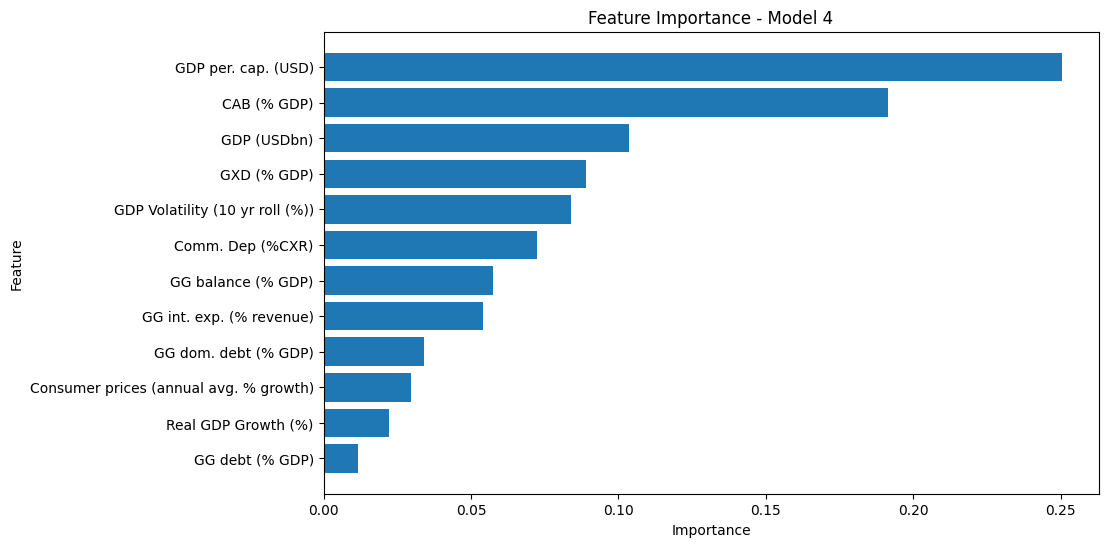

In [ ]:
# Feature Important Global (using the best_model4)
# Cek Feature Importance untuk Model 4
feature_importance_model4 = best_model4.feature_importances_
feature_importance_df_model4 = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_model4})
feature_importance_df_model4 = feature_importance_df_model4.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Model 4):")
print(feature_importance_df_model4)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_model4['Feature'], feature_importance_df_model4['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Model 4')
plt.gca().invert_yaxis()
plt.show()